In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Import visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
raw_lending_path = Path("Resources/lending_data.csv")
raw_lending_df = pd.read_csv(raw_lending_path)

# Review the DataFrame
raw_lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [3]:
# Check for imbalanced classes
raw_lending_df['loan_status'].value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [4]:
# Check for imputation
raw_lending_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [5]:
raw_lending_df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [6]:
# Feature selection
# correlation analysis
corrs = raw_lending_df.corr()
corrs

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999905,0.999893,0.951847,0.988507,0.840407,0.999893,0.758846
interest_rate,0.999905,1.000000,0.999994,0.951938,0.988515,0.840596,0.999994,0.758900
borrower_income,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
debt_to_income,0.951847,0.951938,0.951950,1.000000,0.941078,0.825668,0.951950,0.589305
num_of_accounts,0.988507,0.988515,0.988509,0.941078,1.000000,0.818320,0.988509,0.749802
derogatory_marks,0.840407,0.840596,0.840577,0.825668,0.818320,1.000000,0.840577,0.553187
total_debt,0.999893,0.999994,1.000000,0.951950,0.988509,0.840577,1.000000,0.758890
loan_status,0.758846,0.758900,0.758890,0.589305,0.749802,0.553187,0.758890,1.000000


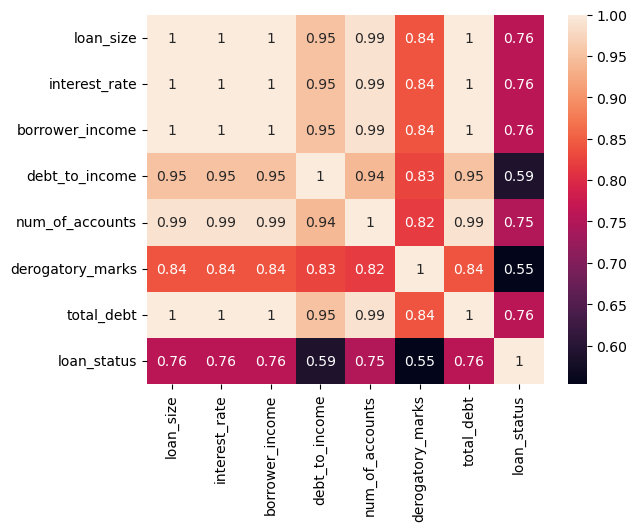

In [7]:
sns.heatmap(corrs, annot=True)
plt.show()

### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [8]:
raw_lending_df.columns 

Index(['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt', 'loan_status'],
      dtype='object')

In [9]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = raw_lending_df["loan_status"]
print(y.head())

# Separate the X variable, the features
X = raw_lending_df.copy()
X.drop("loan_status", axis=1, inplace=True)
X.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


In [10]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [11]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [12]:
# Split the data using train_test_split
# Assign a random_state of 1 to the function

# Due to the imbalance in the classes, we will stratify the y labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Review the X_train DataFrame
X_train.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
44997,8500.0,6.722,43900,0.316629,3,0,13900
13468,10000.0,7.360,49900,0.398798,4,0,19900
52163,8400.0,6.708,43700,0.313501,3,0,13700
5330,11000.0,7.779,53800,0.442379,5,1,23800
9982,8900.0,6.924,45800,0.344978,3,0,15800


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [13]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
lr_model = LogisticRegression(random_state=1)

# Fit the model using training data
lr_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [14]:
# Make a prediction using the testing data
y_pred = lr_model.predict(X_test)

In [15]:
# Capture probability values to generate ROC curve
y_proba = lr_model.predict_proba(X_test)[:,1]

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [16]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: {cm}")

Confusion Matrix: [[18673    86]
 [   32   593]]


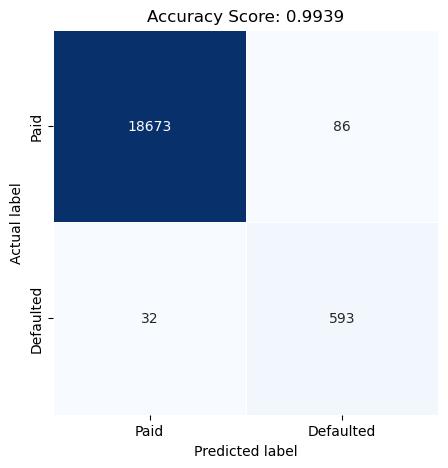

In [17]:
# Confusion matrix visualization
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues', cbar=False, 
            xticklabels=['Paid', 'Defaulted'], yticklabels=['Paid', 'Defaulted']);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = f"Accuracy Score: {lr_model.score(X_test, y_test):.4f}";
plt.title(all_sample_title, size = 12);
plt.show()

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,18673,86
Actual 1,32,593


Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.99      0.99     19384



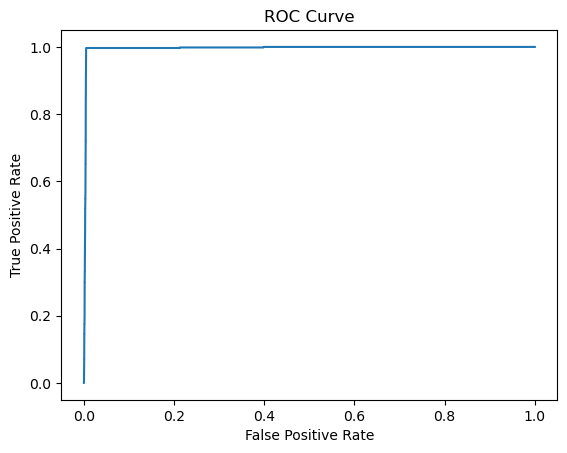

In [18]:
# Visualize the confusion matrix
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Display the confusion matrix
print("Confusion Matrix")
display(cm_df)

# Generate a classification report for the model

# Print the classification report
print("Classification Report")
print(classification_report(y_test, y_pred))

# Plot the ROC curve of the model
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [19]:
# Print the classification report for the model
cr = classification_report(y_test, y_pred)
print(f"Classification Report: {cr}")

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.95      0.91       625

    accuracy                           0.99     19384
   macro avg       0.94      0.97      0.95     19384
weighted avg       0.99      0.99      0.99     19384



AUC Score: 0.9963734527426835


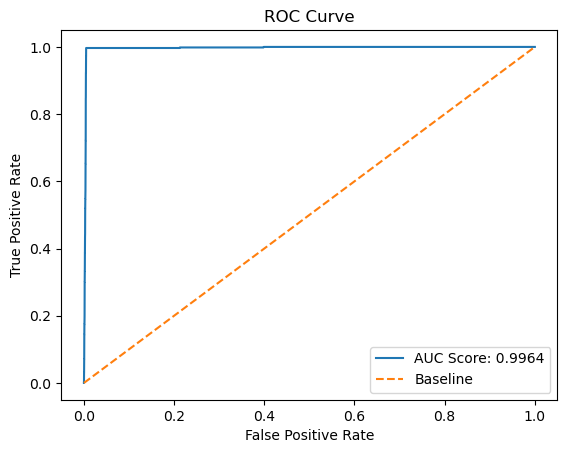

In [20]:
# Visualize the ROC curve
auc = roc_auc_score(y_test, y_proba)
print(f"AUC Score: {auc}")

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC Score: {auc:.4f}")
plt.plot([0, 1], [0, 1], linestyle="--", label="Baseline")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The logistic regression model predicts healthy loans very well, as precission, recall and f1-score are near perfect. The model predicts high-risk loans quite well, as it has 94% recall and 89% f1-score. However, precision indicates that about 84% of the healthy loans were incorrectly mislabeled as high-risk. Saying so, it is worth mentioning that the models suffers from class imbalance which could explain the difference in performance between predicting healthy and high-risk loans. 

In summary, this model is very effective on predicting healthy loans while is reasonably effective at identifying high-risk loans. 

---